# Linear model & Least Square

For notation, check the book on pages 9 to 11.

![SNOWFALL](book.png)

Linear model in the normal form :$$\hat{Y} = \hat{\beta}_0 + \sum_{j=1}^{p} X_j \hat{\beta}_j$$

With matrix form:$$\hat{Y} = X^T \hat{\beta}$$

$$\hat{Y} = \begin{bmatrix} 1 & X_1 & X_2 & \dots & X_p \end{bmatrix} \begin{bmatrix} \hat{\beta}_0 \\ \hat{\beta}_1 \\ \hat{\beta}_2 \\ \vdots \\ \hat{\beta}_p \end{bmatrix} = 1 \cdot \hat{\beta}_0 + X_1 \hat{\beta}_1 + X_2 \hat{\beta}_2 + \dots + X_p \hat{\beta}_p = \hat{\beta}_0 + \sum_{j=1}^{p} X_j \hat{\beta}_j$$

---
The method of least squares involves selecting the coefficients β such that the residual sum of squares (RSS) is minimized.

the RSS is defined by
$$\text{RSS}(\beta) = \sum_{i=1}^{N} (y_i - x_i^T \beta)^2.$$

with the matrix form
$$\text{RSS}(\beta) = (y - X\beta)^T (y - X\beta),$$

Differentiating w.r.t. β by using 
$$
\boxed{
\frac{\partial (\mathbf{B}x + \mathbf{b})^T \mathbf{C}(\mathbf{D}x + \mathbf{d})}{\partial x} = \mathbf{B}^T \mathbf{C}(\mathbf{D}x + \mathbf{d}) + \mathbf{D}^T \mathbf{C}^T (\mathbf{B}x + \mathbf{b})
}
$$

we get the normal equations
$$ - 2 X^T (y - X\beta) = \mathbf{0} \iff X^T (y - X\beta) = \mathbf{0}$$

If (X^T X) is nonsingular, then the unique solution is given by
$$\boxed{\hat{\beta} = (X^T X)^{-1}X^T y}$$

**Note that you can differentiate by using the non matrix form and then vectorise you will find the same result**

---
For prediction
$$\hat{y}_i = \hat{y}(x_i) = x_i^T \hat{\beta} = 1 \cdot \hat{\beta}_0 + x_1 \hat{\beta}_1 + x_2 \hat{\beta}_2 + \dots + x_p \hat{\beta}_p = \hat{\beta}_0 + \sum_{j=1}^{p} x_j \hat{\beta}_j$$

In [1]:
def least_square(X,y):
    X = np.append( np.ones((X.shape[0],1)),X, axis=1)
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y) 

In [2]:
def predict_least_square(X,beta):
    X_ = np.append( np.ones((X.shape[0],1)),X, axis=1)
    pred = np.dot(X_,beta.reshape(beta.shape[0],1))
    return pred

## least Square for classification

In [3]:
import numpy as np
from numpy.linalg import inv
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                  random_state=40)

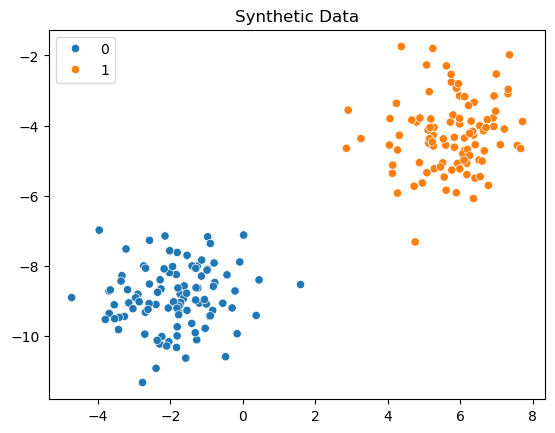

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.title("Synthetic Data")
plt.show()

In [6]:
X.shape

(200, 2)

In [7]:
beta = least_square(X,y)

In [8]:
beta

array([0.71695561, 0.08808802, 0.05899081])

In [9]:
X_test = np.array([[-2,-8],
             [6,-2],
             [-4,-2],
              [3,-6]])
predictions = predict_least_square(X_test,beta)
print(predictions)

[[0.06885309]
 [1.12750208]
 [0.24662193]
 [0.62727479]]


$$
\hat{G} = \begin{cases} \text{\color{orange}ORANGE 1} & \text{if } \hat{Y} > 0.5, \\ \text{\color{blue}BLUE 0} & \text{if } \hat{Y} \leq 0.5. \end{cases}
$$

In [10]:
pred_label = [1 if i > 0.5 else 0 for i in predictions]
print(pred_label)


[0, 1, 0, 1]


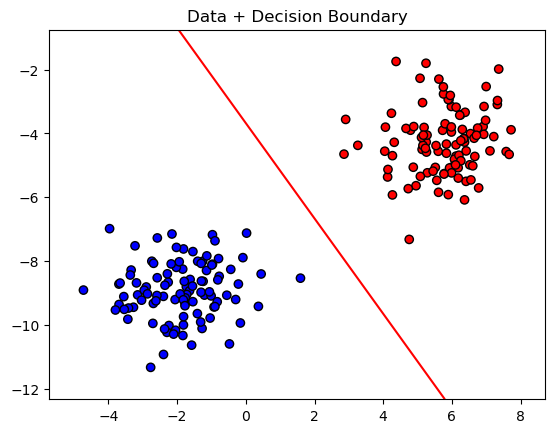

In [11]:
# let's find the boundary where the pred = 0.5
def plot_decision_boundary(X, y, beta, resolution=0.01):
    """
    Plot decision boundary where predicted probability = 0.5
    """
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Flatten the grid and add bias term
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    Z = predict_least_square(grid_points, beta)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary (probability = 0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors='red')

    # Plot original data
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolors='k')
    plt.title("Data + Decision Boundary")
    plt.show()


plot_decision_boundary(X,y,beta, resolution=0.01)

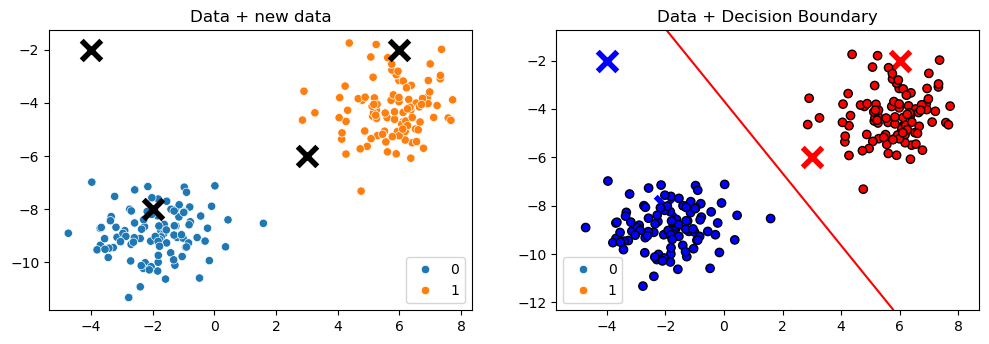

<Figure size 640x480 with 0 Axes>

In [12]:
# let's visualise
plt.figure(figsize=(12, 8))

plt.subplot(221)
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
for i in X_test:
    plt.scatter(i[0],i[1],marker="x",c="black",s=200, linewidths= 4)
plt.title("Data + new data")

plt.subplot(222)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
for idx, point in enumerate(X_test):
    color = 'red' if pred_label[idx] == 1 else 'blue'
    plt.scatter(point[0], point[1], marker='x', color=color, s=200,linewidths= 4)
plot_decision_boundary(X,y,beta, resolution=0.01);
plt.tight_layout()
plt.show()

## least Square for Regression

In [13]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

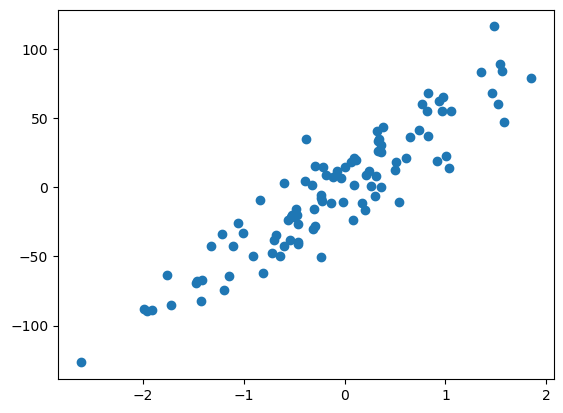

In [14]:
plt.scatter(X,y)

In [15]:
beta = least_square(X,y)

In [16]:
beta

array([ 2.33023064, 47.13323967])

In [17]:
x_ = np.array([[X.min() - 1 ],[ X.max() + 1]])
reg_line = predict_least_square(x_,beta)

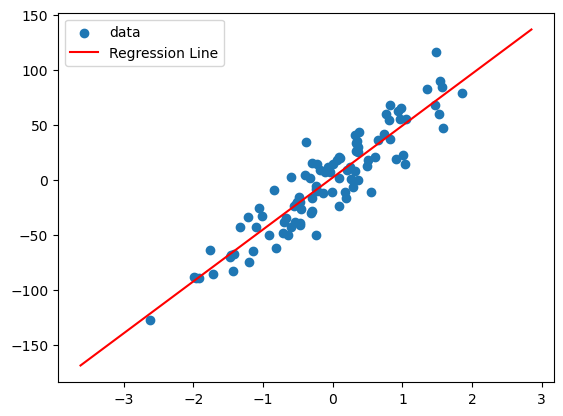

In [18]:
plt.scatter(X,y,label ="data")
plt.plot(x_,reg_line,c='red',label="Regression Line")
plt.legend()

# KNN (K-nearest neighbor)

$$\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i\quad$$
where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

## Neighborhood

In [19]:
def Neighborhood(x, X, y, k):
    """
    Find the k-closest point to x
    """
    # Distance beetween all the data and our new one (d(x,Xi))
    d = dict()
    for i, row in enumerate(X):
        d[i] = np.sqrt(np.sum((x - row)**2))

    # Now the closest one by sorting the dict d
    sorted_d = {}
    for key in sorted(d, key=d.get):
        sorted_d[key] = d[key]

    neighbors = {}
    # Let's select the k nearest point
    count = 0
    for key in sorted_d.keys():
        neighbors[key]= sorted_d[key]
        count +=1
        if (count == k):
            break
    return neighbors

In [20]:
# let's test it
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2,cluster_std=3,
                  random_state=40)

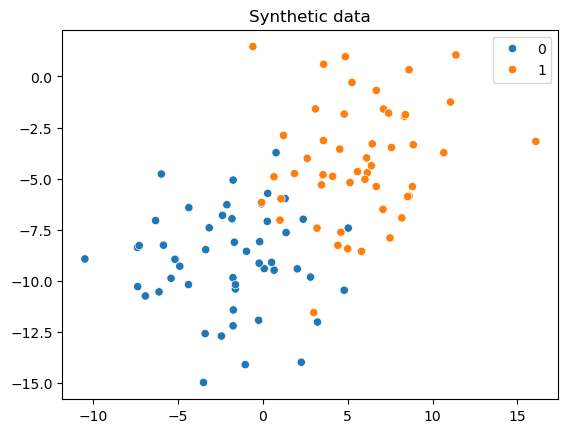

In [21]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.title("Synthetic data")
plt.show()

In [22]:
x = np.array([0,-4])
neighbors = Neighborhood(x,X,y,6)
print(neighbors)

{65: 0.8209621605743754, 39: 1.1242520121090271, 74: 1.6518807855109017, 24: 1.7493718263251818, 27: 2.0097931702265064, 18: 2.0546012176852035}


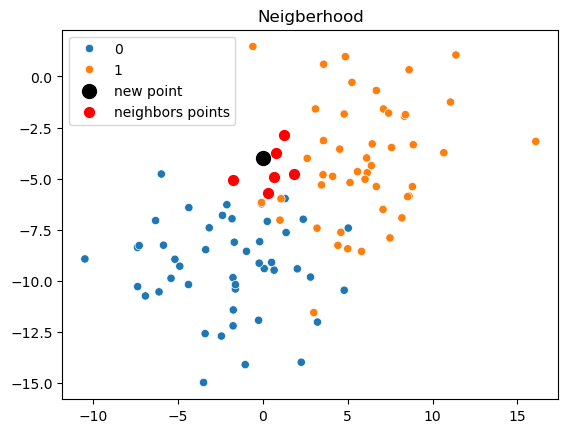

In [23]:
# Let's visualise this
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.scatter(x[0],x[1],c='black',s=100,label = 'new point')
first = True
for key in neighbors.keys():
    if first:
        plt.scatter(x=X[key][0], y=X[key][1], c='red',s = 50,label="neighbors points")
        first = False
    else:
        plt.scatter(x=X[key][0], y=X[key][1], c='red',s = 50)
plt.title("Neigberhood")
plt.legend()
plt.show()

Now it's time for the predictions using the neighbors points

## Prediction

### Classification

You can see that by applying the formula that we defined above
$$\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i\quad$$

the result is the proportion of the class 1 in the neighborhood, so we can predict using 

$$
\hat{G} = \begin{cases} \text{1} & \text{if } \hat{Y} > 0.5, \\ \text{0} & \text{if } \hat{Y} \leq 0.5. \end{cases}
$$

In [24]:
def predict_classification(x,X,y,k):
    neighbors = Neighborhood(x,X,y,k)
    pred = np.mean(y[list(neighbors.keys())])
    return pred


In [25]:
predict_classification(x,X,y,6)

0.5

In [26]:
# let's see the boundary for different value of k
def plot_knn_decision_boundary(X, y, k, resolution=0.1):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict class for each point in the grid using KNN
    Z = np.array([predict_classification(x, X, y, k) for x in grid_points])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors='red')

    # Plot the original data
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolors='k')
    plt.title(f"Decision Boundary (k={k})")
    plt.show()


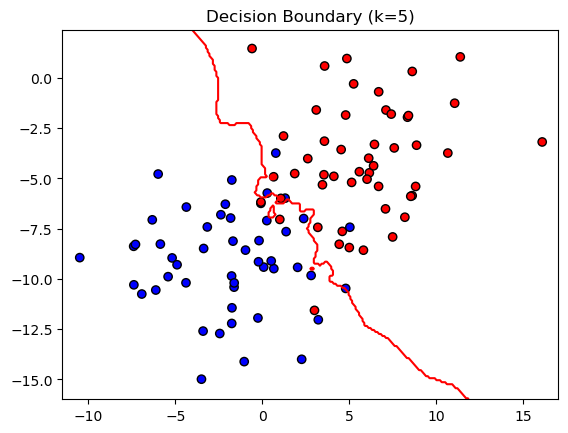

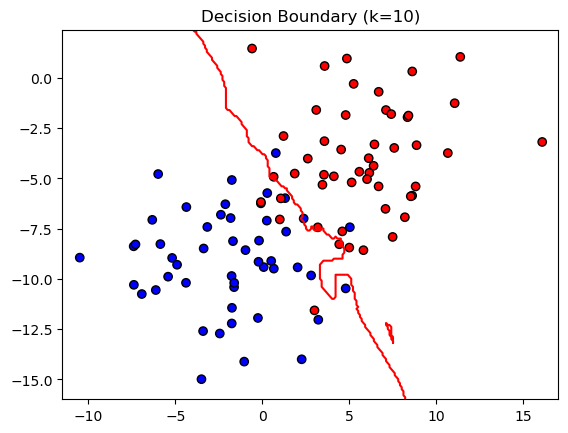

In [27]:
# let's visualise
plot_knn_decision_boundary(X, y, k=5, resolution=0.1)
plot_knn_decision_boundary(X, y, k=10, resolution=0.1)

### Regression

#### Averaging

In [28]:
def predict_average(x,X,y,k):
    neighbors = Neighborhood(x,X,y,k)
    pred = np.mean(y[list(neighbors.keys())])
    return neighbors,pred

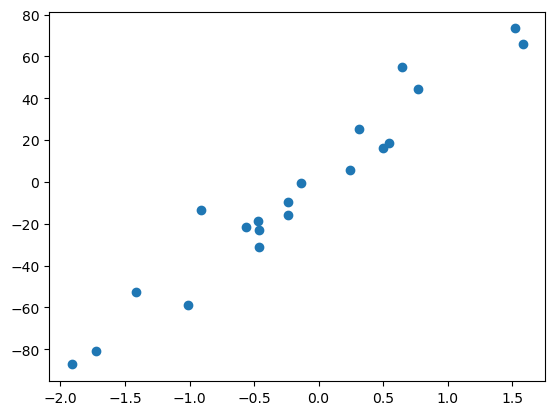

In [29]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=20, n_features=1, noise=10, random_state=42)
plt.scatter(X,y)

In [30]:
x = np.array([-1])
neig , pred = predict_average(x,X,y,5)
print(pred)

-33.03975418723438


In [31]:
print(neig)

{7: 0.012831120334423796, 4: 0.0919759244787891, 5: 0.4123037013352915, 13: 0.4377124707590273, 10: 0.5305256140650478}


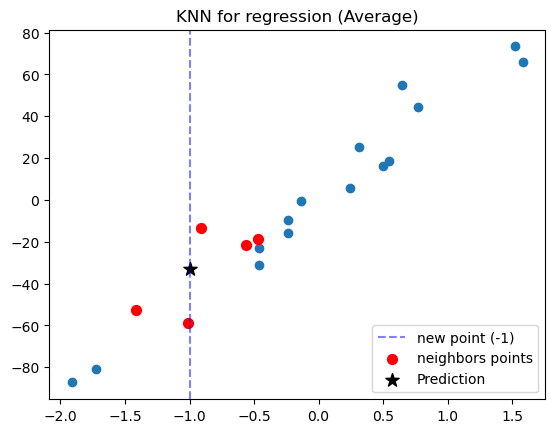

In [32]:
# Let's visualise
plt.scatter(X,y)
plt.axvline(x=-1, color='blue', linestyle='--', alpha=0.5,label="new point (-1)")
first = True
for key in neig.keys():
    if first:
        plt.scatter(x=X[key], y=y[key], c='red',s = 50,label="neighbors points")
        first = False
    else:
        plt.scatter(x=X[key], y=y[key], c='red',s = 50)
plt.scatter(x,pred,c='black',marker='*',s=100,label="Prediction")
plt.title("KNN for regression (Average)")
plt.legend()
plt.show()

#### KNN with Least square

In [33]:
def knn_predict_ll(x,X,y,k):
    neighbors = Neighborhood(x,X,y,k)
    beta = least_square(X[list(neighbors.keys())],y[list(neighbors.keys())])
    pred = predict_least_square(x.reshape(1,1),beta)
    return beta,neighbors, pred

In [34]:
beta, neighbors , pred_ll = knn_predict_ll(x,X,y,5)
print(pred_ll)

[[-38.10789478]]


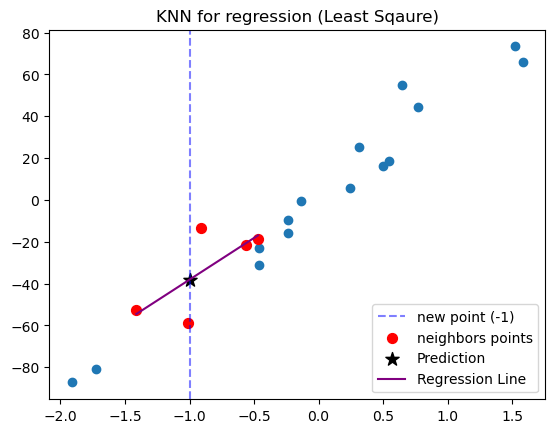

In [35]:
# Let's visualise
plt.scatter(X,y)
plt.axvline(x=-1, color='blue', linestyle='--', alpha=0.5,label="new point (-1)")
first = True
for key in neig.keys():
    if first:
        plt.scatter(x=X[key], y=y[key], c='red',s = 50,label="neighbors points")
        first = False
    else:
        plt.scatter(x=X[key], y=y[key], c='red',s = 50)
plt.scatter(x,pred_ll,c='black',marker='*',s=100,label="Prediction")

# reg_line
x_ = np.array([[X[list(neighbors.keys())].min()],[ X[list(neighbors.keys())].max()]])
reg_line = predict_least_square(x_,beta)
plt.plot(x_,reg_line,c='purple',label="Regression Line")

plt.title("KNN for regression (Least Sqaure)")
plt.legend()
plt.show()